In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("EmployeeAttrition.csv")

In [4]:
data.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [5]:
le = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [6]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

C:\Users\ABC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [10]:
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_classification_report = classification_report(y_test, logistic_regression_predictions)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)

In [11]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
decision_tree_predictions = decision_tree_model.predict(X_test)

In [13]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)

In [14]:
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {logistic_regression_accuracy:.2f}")
print("Classification Report:\n", logistic_regression_classification_report)
print("Confusion Matrix:\n", logistic_regression_confusion_matrix)

Logistic Regression Performance Metrics:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       255
           1       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.75      0.86      0.80       294

Confusion Matrix:
 [[252   3]
 [ 39   0]]


In [15]:
print("\nDecision Tree Performance Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_classification_report)
print("Confusion Matrix:\n", decision_tree_confusion_matrix)


Decision Tree Performance Metrics:
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294

Confusion Matrix:
 [[226  29]
 [ 30   9]]


Text(0, 0.5, 'Actual')

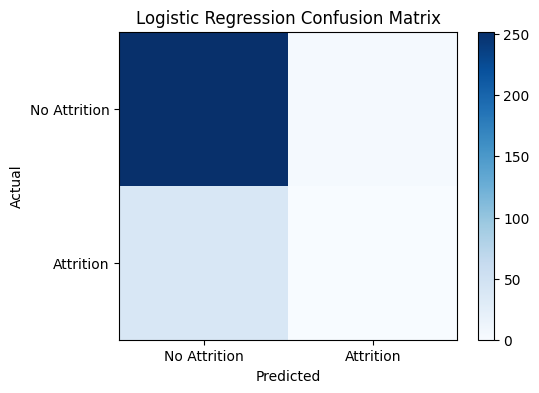

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
plt.imshow(logistic_regression_confusion_matrix, cmap='Blues', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.yticks([0, 1], ['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Actual')

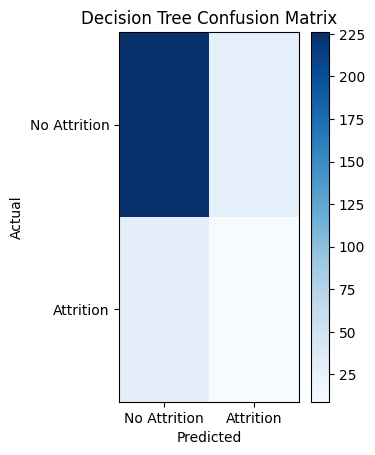

In [17]:
plt.subplot(1, 2, 2)
plt.title("Decision Tree Confusion Matrix")
plt.imshow(decision_tree_confusion_matrix, cmap='Blues', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.yticks([0, 1], ['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>